# Time Series on Restaurant Visitors

In [1]:
import numpy as np  # numerical computation
import pandas as pd # data manipulation, data analysis
import matplotlib.pyplot as plt  # graph representation
import seaborn as sns  # making statistical graphics

In [2]:
import os 

In [3]:
os.chdir("C:/Users/vishw/OneDrive/Documents/Imarticus/Python/Machine Learning/Time Series Dataset")

In [4]:
rv = pd.read_csv("RestaurantVisitors.csv", index_col = "date", parse_dates = True)
rv.shape    # data columns and rows

(517, 8)

In [5]:
# finding the NULL values
rv.isnull().sum()

weekday          0
holiday          0
holiday_name     0
rest1           39
rest2           39
rest3           39
rest4           39
total           39
dtype: int64

In [6]:
# printing first 10 data
rv.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [7]:
# we dropping the NA from all the columns
rv = rv.dropna()

In [8]:
rv.shape

(478, 8)

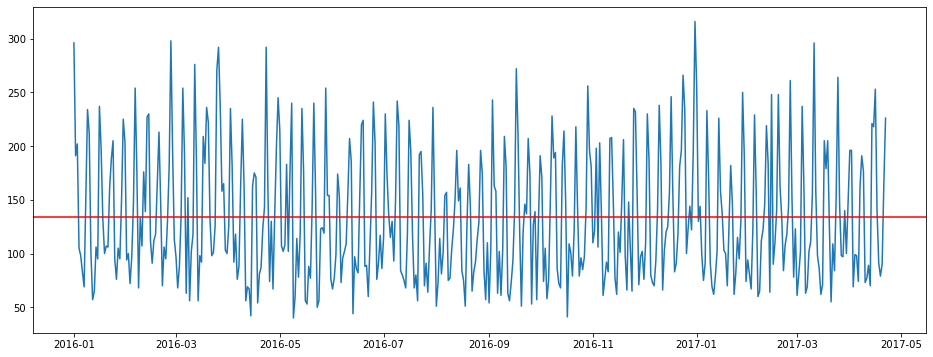

In [9]:
plt.figure(figsize =(16,6))
plt.plot(rv.total)
plt.axhline(y = rv.total.mean(), color = "r")
# from the graph we can say there is no uptrend or downtrend. data is almost stationary

In [10]:
rv.total.mean() # mean of the total restaurants 

133.7928870292887

In [11]:
# to get the dates on which there is a holiday
rv[rv["holiday"]== 1].index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

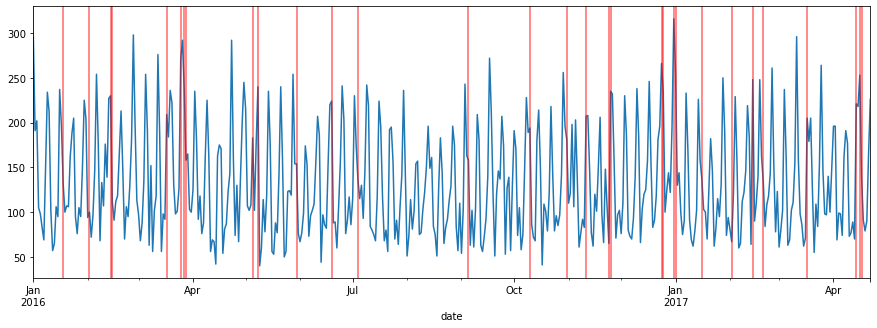

In [12]:
index_pos = rv[rv["holiday"] == 1].index
ax = rv["total"].plot(figsize = (15,5))
for day in index_pos :
    ax.axvline(x =day, color = "red", alpha = .6) # this will give lines parrelel to y axis
    
# SARIMA will not be able to handle holidays, however we need to use SARIMAX to take care of holidays seperatly.

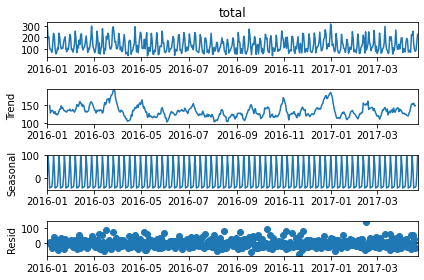

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
rv_seasonal = seasonal_decompose(rv["total"])
rv_seasonal.plot();

# from the graph we can intepret that there is no trend in the data and it is seasonal.

In [14]:
train_rv = rv.iloc[0:450] # 1st 450 in train
test_rv = rv.iloc[450:479]  # last few records in test

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

In [16]:
auto_arima(rv["total"], seasonal = True, m = 7)

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model1 = SARIMAX(train_rv["total"], order = (1,0,0), seasonal_order=(1,0,1,7))
results = model1.fit()

# model has been created

C:\Users\vishw\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\vishw\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [18]:
pred_rv = results.predict(start = 450, end = 477 )

pred_rv

2017-03-26    180.795817
2017-03-27     91.785128
2017-03-28     95.813346
2017-03-29     95.445185
2017-03-30     96.925812
2017-03-31    145.254155
2017-04-01    232.331304
2017-04-02    174.636170
2017-04-03     90.584548
2017-04-04     95.573998
2017-04-05     95.392577
2017-04-06     96.909341
2017-04-07    145.240868
2017-04-08    232.312435
2017-04-09    174.622171
2017-04-10     90.577307
2017-04-11     95.566369
2017-04-12     95.384965
2017-04-13     96.901608
2017-04-14    145.229278
2017-04-15    232.293897
2017-04-16    174.608236
2017-04-17     90.570079
2017-04-18     95.558743
2017-04-19     95.377353
2017-04-20     96.893875
2017-04-21    145.217689
2017-04-22    232.275361
Freq: D, Name: predicted_mean, dtype: float64

In [19]:
# get the holiday information only for the test data

test_rv[test_rv["holiday"]==1].index

DatetimeIndex(['2017-04-14', '2017-04-16', '2017-04-17'], dtype='datetime64[ns]', name='date', freq=None)

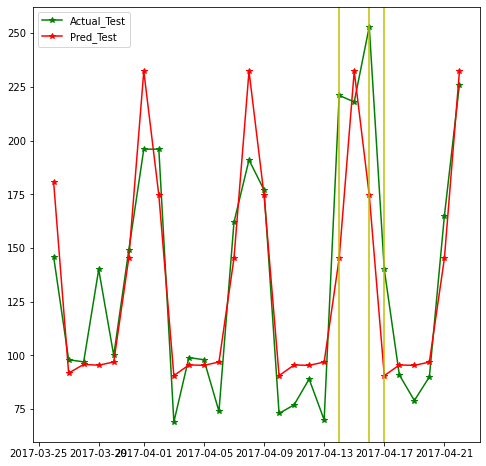

In [20]:
plt.figure(figsize = (8,8))
plt.plot(test_rv.total, marker = "*", color ="g", label = "Actual_Test")
plt.plot(pred_rv, color = "r", marker = "*", label = "Pred_Test")
plt.legend()
plt.axvline(x = "2017-04-14", color = "y")
plt.axvline(x = "2017-04-16", color = "y")
plt.axvline(x = "2017-04-17", color = "y")

# predicted values are much less than actual on holidays, it justifies SARIMA does not work well on holiday prediction hence we are using SARIMAX

In [21]:
mse = np.mean(np.square(test_rv.total - pred_rv))
print("MSE value is :", mse)

rmse = np.sqrt(mse)
print("RMSE value is :", rmse)

MSE value is : 884.2058432740263
RMSE value is : 29.7355989224032


In [22]:
auto_arima(rv["total"], seasonal = True, m = 7, exogenous = rv[["holiday"]])

ARIMA(order=(0, 0, 1), scoring_args={}, seasonal_order=(2, 0, 0, 7),
      suppress_warnings=True)

In [23]:
model2 = SARIMAX(train_rv["total"], order = (0,0,1), seasonal_order= (2,0,0,7), exog = train_rv[["holiday"]])
results1 = model2.fit()

C:\Users\vishw\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\vishw\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\vishw\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
pred_rv_exog = results1.predict(start = 450 , end = 477, exog = test_rv[["holiday"]])
pred_rv_exog

2017-03-26    183.579697
2017-03-27    109.030071
2017-03-28     68.302133
2017-03-29     83.954009
2017-03-30     75.706917
2017-03-31    141.748975
2017-04-01    217.008418
2017-04-02    189.079893
2017-04-03    113.836618
2017-04-04     60.263854
2017-04-05     93.699248
2017-04-06     77.718917
2017-04-07    143.962800
2017-04-08    233.784025
2017-04-09    181.677933
2017-04-10    108.671406
2017-04-11     62.546634
2017-04-12     86.703271
2017-04-13     74.794381
2017-04-14    207.867496
2017-04-15    219.902991
2017-04-16    249.185040
2017-04-17    176.969278
2017-04-18     59.878439
2017-04-19     87.821500
2017-04-20     74.284354
2017-04-21    137.959852
2017-04-22    220.907881
Freq: D, Name: predicted_mean, dtype: float64

In [25]:
mse = np.mean(np.square(test_rv.total - pred_rv_exog))
print("MSE value is :", mse)

rmse = np.sqrt(mse)
print("RMSE value is :", rmse)

# now we can say that the model has improved after using SARIMAX.

MSE value is : 623.8875275877439
RMSE value is : 24.977740642174663


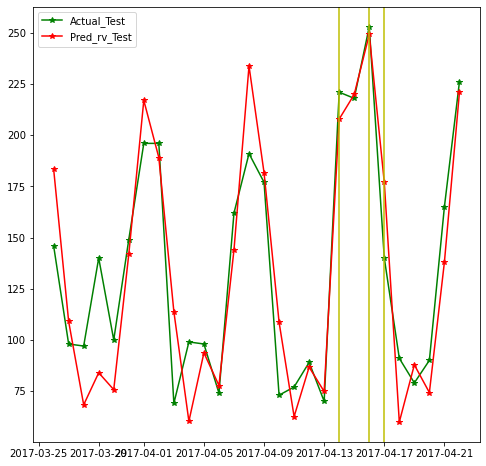

In [27]:
# Here we plotting the SARIMAX results.
plt.figure(figsize = (8,8))
plt.plot(test_rv.total, marker = "*", color ="g", label = "Actual_Test")
plt.plot(pred_rv_exog, color = "r", marker = "*", label = "Pred_rv_Test")
plt.legend()
plt.axvline(x = "2017-04-14", color = "y")
plt.axvline(x = "2017-04-16", color = "y")
plt.axvline(x = "2017-04-17", color = "y")

### Interpretation: 

#### with the above graph can be justified that the model is accurately predicting the seasonality even with the holidays.